In [0]:
import numpy as np
import tensorflow as tf


In [0]:
g=tf.Graph()
with g.as_default():
  tf_X=tf.placeholder(shape=(None),dtype=tf.float32,name='tf_X')
  tf_y=tf.placeholder(shape=(None),dtype=tf.float32,name='tf_y')
  weight=tf.Variable(tf.random_normal(shape=(1,1),stddev=0.25),
                     name='weight')
  bias=tf.Variable(0.0,name='bias')
  y_hat=tf.add(weight*tf_X,bias,name='y_hat')
  cost=tf.reduce_mean(tf.square(tf_y-y_hat),name='cost')
  optim=tf.train.GradientDescentOptimizer(learning_rate=0.001)
  train_op=optim.minimize(cost,name='train_op') 
  saver=tf.train.Saver()

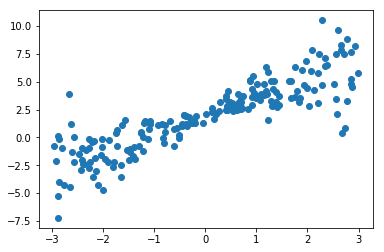

In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
def make_random_data():
  x=np.random.uniform(low=-3,high=3,size=200)
  y=[]
  for t in x:
    r=np.random.normal(loc=0.0,scale=(0.5+t*t/3),size=None)
    y.append(r)
  return x,1.762*x+2.102+np.array(y)

x,y=make_random_data()
plt.plot(x,y,'o')
plt.show()
    
  

In [26]:
X_train,y_train=x[:100],y[:100]
X_test,y_test=x[100:],y[100:]
n_epoch=1500
training_cost=[]
with tf.Session(graph=g) as sess:
  sess.run(tf.global_variables_initializer())
  for e in range(n_epoch):
    c,_=sess.run([cost,train_op],feed_dict={tf_X:X_train,
                                           tf_y:y_train})
    training_cost.append(c)
    if not e%100:
      print("epoch %4d : %.4f"%(e,c))
  
  s=saver.save(sess,'./trained-model')
  print(s)

epoch    0 : 10.8626
epoch  100 : 6.1695
epoch  200 : 4.2868
epoch  300 : 3.3974
epoch  400 : 2.9106
epoch  500 : 2.6159
epoch  600 : 2.4272
epoch  700 : 2.3031
epoch  800 : 2.2203
epoch  900 : 2.1648
epoch 1000 : 2.1275
epoch 1100 : 2.1024
epoch 1200 : 2.0855
epoch 1300 : 2.0741
epoch 1400 : 2.0664
./trained-model


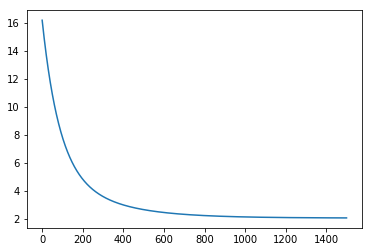

In [0]:
plt.plot(training_cost)
plt.show()

In [0]:
n_epoch=1500
with tf.Session(graph=g) as sess:
  sess.run(tf.global_variables_initializer())
  for e in range(n_epoch):
    c,_=sess.run(['cost:0','train_op'],feed_dict={'tf_X:0':X_train,'tf_y:0':y_train})
    training_cost.append(c)
    if e%100==0:
      print("Epoch %4d : %.4f"%(e,c))
      

Epoch    0 : 11.1917
Epoch  100 : 6.2720
Epoch  200 : 4.3205
Epoch  300 : 3.4096
Epoch  400 : 2.9157
Epoch  500 : 2.6184
Epoch  600 : 2.4286
Epoch  700 : 2.3039
Epoch  800 : 2.2209
Epoch  900 : 2.1652
Epoch 1000 : 2.1277
Epoch 1100 : 2.1026
Epoch 1200 : 2.0856
Epoch 1300 : 2.0742
Epoch 1400 : 2.0665


In [0]:
with tf.Session() as sess:
  new_saver=tf.train.import_meta_graph('./trained-model.meta')

In [23]:
g2=tf.Graph()
with tf.Session(graph=g2) as sess:
  new_saver=tf.train.import_meta_graph('./trained-model.meta')
  new_saver.restore(sess,'./trained-model')
  y_pred=sess.run('y_hat:0',feed_dict={'tf_X:0':X_test})

INFO:tensorflow:Restoring parameters from ./trained-model


In [0]:
print(y_pred)

[[ 3.4081407  -0.27762115  3.9267168   5.9782867  -0.46972144  2.4893477
   2.6329122   2.4540505  -0.7017399   5.892972    1.3231609   4.9318714
   3.6039279  -0.02971876  4.6371355   0.86566204  5.2454395   2.5355818
   5.251153    3.5411348   3.8368816   1.8130097   5.92311     3.1024191
   1.1128442   2.7626188  -2.544477    0.00767922  3.2486837  -0.0962323
   2.86766     1.1572537  -1.4935347  -0.02207828  2.4333808   2.6223454
   2.4727893   3.1856644   3.1757448   1.1812019   5.3850164   0.60406816
   1.2213892   5.3432317   4.5684123   3.6437788  -1.8120974   5.5923114
   3.7373466   6.3096046  -1.3672355   5.1281524  -1.2493385   2.845464
  -1.5988637   4.946328    4.57858     2.4255705   0.9621655  -2.0928159
   3.5853953   1.3811603   3.807972    5.1123924   6.0987897   5.01678
  -2.612073    0.5355259   3.8796878  -1.166761    1.9911683  -2.22684
  -0.9103824  -2.5505457   4.455471   -0.6941203   0.4033332   5.670026
   3.6485314  -2.4301853  -1.2294441   2.8989582   2.499

INFO:tensorflow:Restoring parameters from ./trained-model
[-2. -1.  0.  1.  2.  3.]
[-1.2111696   0.29521954  1.8016087   3.3079977   4.814387    6.320776  ]


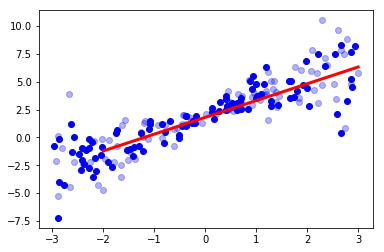

In [45]:
import matplotlib.pyplot as plt
x_arr=np.arange(-2,4,0.01)
g3=tf.Graph()
with tf.Session(graph=g3) as sess:
  new_saver=tf.train.import_meta_graph('./trained-model.meta')
  new_saver.restore(sess,'./trained-model')
  y_arr=sess.run('y_hat:0',feed_dict={'tf_X:0':x_arr})

plt.figure()
plt.plot(X_train,y_train,'bo')
plt.plot(X_test,y_test,'bo',alpha=0.3)
plt.plot(x_arr,y_arr.T[:,0],'-r',lw=3)
# print(x_arr)
# print(y_arr.T[:,0])
plt.show()